In [61]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt


In [62]:
image = plt.imread("./img/boat.png")[:,:,0]

In [63]:
def ideal_lowpass_filter(X, fcx, fcy):
    
    if X.ndim == 3:
        X = X[:,:,0]
        
    l_x, l_y = np.shape(X)
    mid_x = l_x//2
    mid_y = l_y//2
    
    F = np.fft.fft2(X)
    F = np.fft.fftshift(F)
    
    F[: mid_x - fcx//2, :] = 0
    F[mid_x + fcx//2 : , : ] = 0
    F[ : ,  : mid_y - fcy//2] = 0
    F[:, mid_y + fcy//2 : ] = 0
    
    return F

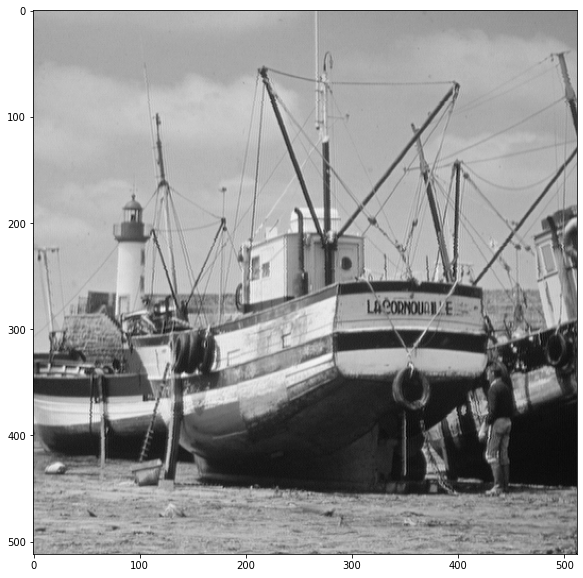

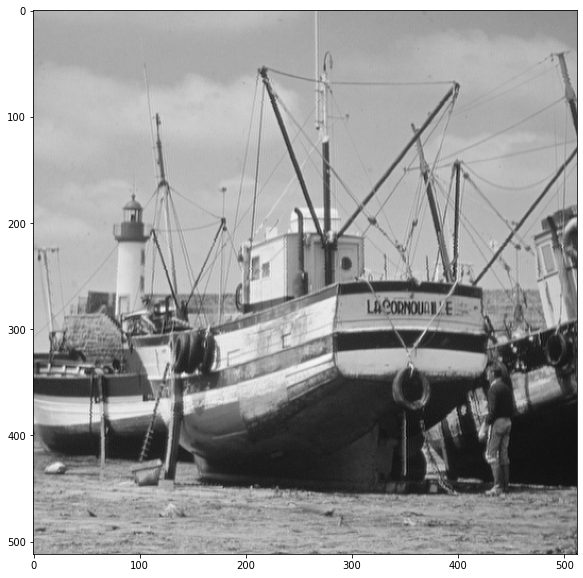

In [69]:
filtered_spectrum = ideal_lowpass_filter(image,500,500)
res = np.abs(fft.ifft2(filtered_spectrum))

plt.figure(figsize=(10,10))
plt.imshow(res, cmap='gray')


plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')

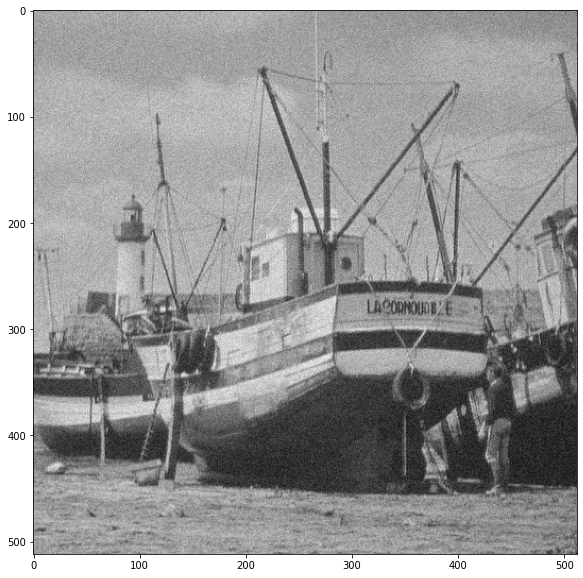

In [84]:
noisy_image = image + np.random.normal(scale=0.05,size=image.shape)
plt.figure(figsize=(10,10))
plt.imshow(noisy_image,cmap='gray')

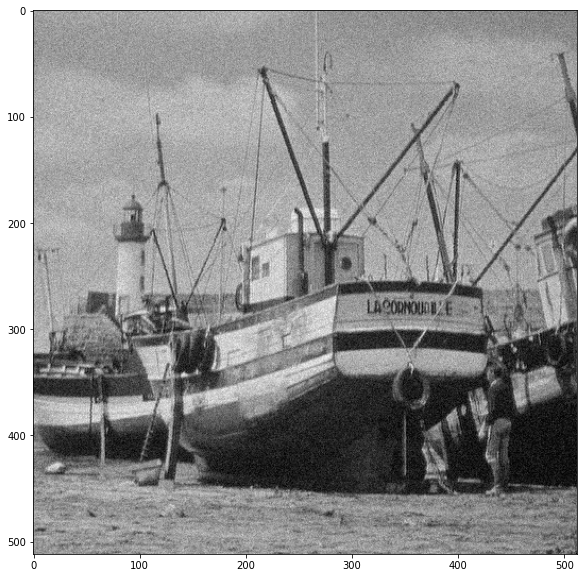

In [85]:
filtered_spectrum = ideal_lowpass_filter(noisy_image,500,500)
res = np.abs(fft.ifft2(filtered_spectrum))

plt.figure(figsize=(10,10))
plt.imshow(res, cmap='gray')